1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

--- Eigenvectors Eigendecomposition ---

 [[-0.10936659 -0.81649658  0.56689707]
 [-0.58493769 -0.40824829 -0.70084323]
 [-0.80367086  0.40824829  0.4329509 ]] 

Eigenvalues Eigendecomposition:  [ 2.94294381e+01 -3.96672720e-16  2.00398531e+00]

---Eigenvectors SVD ---

 [[-0.10936659 -0.81649658  0.56689707]
 [-0.58493769 -0.40824829 -0.70084323]
 [-0.80367086  0.40824829  0.4329509 ]] 

Eigenvalues SVD:  [2.94294381e+01 6.31071469e-17 2.00398531e+00]

Eigenvectors yield same result?:  True
Eigenvalues yield same result?  True 

Percentage of retained variability with component 0, 1 and 2:  100.0
Percentage of retained variability with component 0 and 1:  93.62466732613329
Percentage of retained variability with component 0 and 2:  100.0
Percentage of retained variability with component 1 and 2:  6.375332673866711


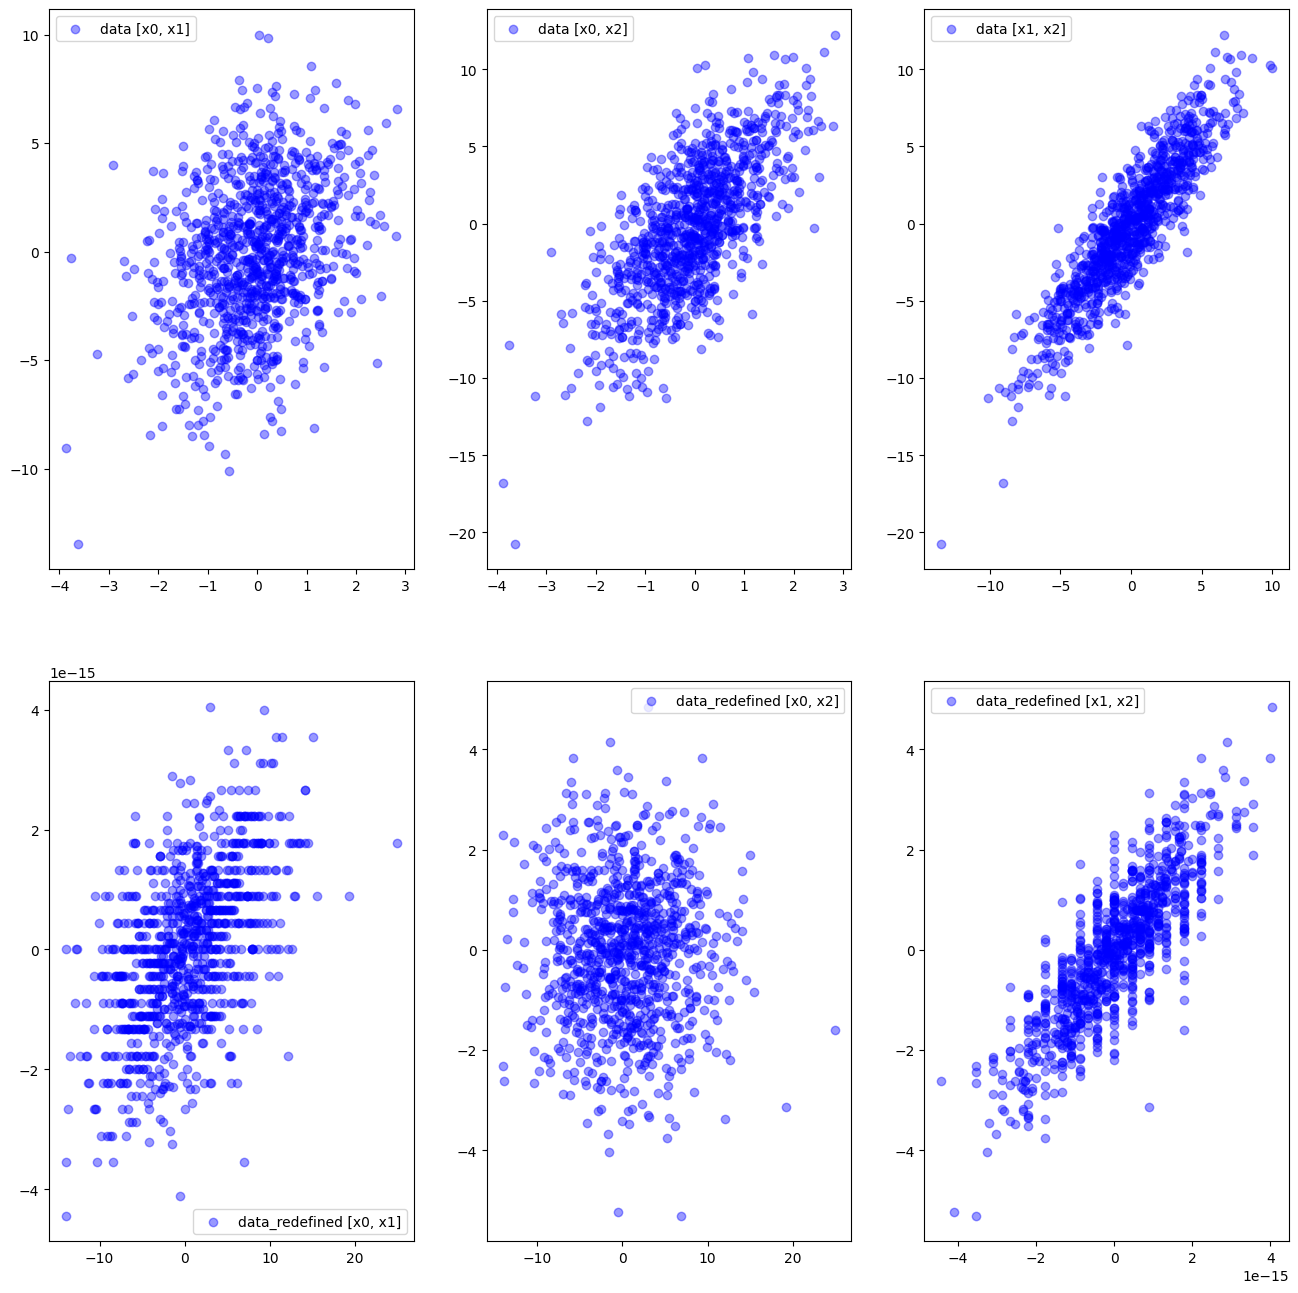

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import linalg as la
from numpy.linalg import eig

N = 1000
x1 = np.random.normal(0, 1, size = N)
x2 = x1 + np.random.normal(0, 3, size = N)
x3 = (2 * x1) + x2
dataset = np.vstack((x1, x2, x3))

cov_matrix = np.cov(dataset)

l, V = la.eig(cov_matrix)
l = np.real_if_close(l)
print("--- Eigenvectors Eigendecomposition ---\n\n", V, "\n")
print("Eigenvalues Eigendecomposition: ", l)

U, S, Vt = la.svd(cov_matrix)

S[1], S[2] = S[2], S[1]
l_svd = S
U[:, [1, 2]] = U[:, [2, 1]]
V_svd = U

print("\n---Eigenvectors SVD ---\n\n", V_svd, "\n")
print("Eigenvalues SVD: ", l_svd)

print('\nEigenvectors yield same result?: ', np.allclose(V,V_svd))
print('Eigenvalues yield same result? ', np.allclose(l,l_svd), '\n')

print("Percentage of retained variability with component 0, 1 and 2: ", np.sum([l[0:3]]) / np.sum(l) * 100)
print("Percentage of retained variability with component 0 and 1: ", np.sum([l[0], l[1]]) / np.sum(l) * 100)
print("Percentage of retained variability with component 0 and 2: ", np.sum([l[0], l[2]]) / np.sum(l) * 100)
print("Percentage of retained variability with component 1 and 2: ", np.sum([l[1], l[2]]) / np.sum(l) * 100)
# Via using components 0 and 2, we get more than 99.9% variability. Mostly 100%
# When we consider how the dataset is created, this makes sense.
# When we have x1 and x3, we can calculate x2 without requaring an extra information. 

dataset_redefined = np.dot(V.T, dataset)

fig, axes = plt.subplots(2,3,figsize=(16, 16))
axes[0,0].scatter(dataset[0,:],dataset[1,:], label = "data [x0, x1]", alpha = 0.4, color = "blue")
axes[0,0].legend()
axes[0,1].scatter(dataset[0,:],dataset[2,:], label = "data [x0, x2]", alpha = 0.4, color = "blue")
axes[0,1].legend()
axes[0,2].scatter(dataset[1,:],dataset[2,:], label = "data [x1, x2]", alpha = 0.4, color = "blue")
axes[0,2].legend()
axes[1,0].scatter(dataset_redefined[0,:],dataset_redefined[1,:], label = "data_redefined [x0, x1]", alpha = 0.4, color = "blue")
axes[1,0].legend()
axes[1,1].scatter(dataset_redefined[0,:],dataset_redefined[2,:], label = "data_redefined [x0, x2]", alpha = 0.4, color = "blue")
axes[1,1].legend()
axes[1,2].scatter(dataset_redefined[1,:],dataset_redefined[2,:], label = "data_redefined [x1, x2]", alpha = 0.4, color = "blue")
axes[1,2].legend()
plt.show()



2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [2]:
noises = np.random.normal(size=(N,3),scale=(1/50))
noised_dataset = dataset + np.sum(noises.T)

cov_matrix_noised = np.cov(noised_dataset)

l_n, V_n = la.eig(cov_matrix_noised)
l_n = np.real_if_close(l_n)
print("--- Eigenvectors Eigendecomposition ---\n\n", V_n, "\n")
print("Eigenvalues Eigendecomposition: ", l_n)

U_n, S_n, Vt_n = la.svd(cov_matrix_noised)

S_n[1], S_n[2] = S_n[2], S_n[1]
l_svd_n = S_n
U_n[:, [1, 2]] = U_n[:, [2, 1]]
V_svd_n = U_n

print("\n---Eigenvectors SVD ---\n\n", V_svd_n, "\n")
print("Eigenvalues SVD: ", l_svd_n)

print('\nEigenvectors yield same result?: ', np.allclose(V_n,V_svd_n))
print('Eigenvalues yield same result? ', np.allclose(l_n,l_svd_n), '\n')

print("Percentage of retained variability with component 0, 1 and 2: ", np.sum([l_n[0:3]]) / np.sum(l_n) * 100)
print("Percentage of retained variability with component 0 and 1: ", np.sum([l_n[0], l_n[1]]) / np.sum(l_n) * 100)
print("Percentage of retained variability with component 0 and 2: ", np.sum([l_n[0], l_n[2]]) / np.sum(l_n) * 100)
print("Percentage of retained variability with component 1 and 2: ", np.sum([l_n[1], l_n[2]]) / np.sum(l_n) * 100)
print("\nWe got the exact same variability with the original data. The added noise did not change our results.")

--- Eigenvectors Eigendecomposition ---

 [[-0.11308541 -0.81649658  0.56616696]
 [-0.58032467 -0.40824829 -0.70466773]
 [-0.80649549  0.40824829  0.42766618]] 

Eigenvalues Eigendecomposition:  [2.68820428e+01 1.76804878e-15 2.01390684e+00]

---Eigenvectors SVD ---

 [[-0.11308541 -0.81649658  0.56616696]
 [-0.58032467 -0.40824829 -0.70466773]
 [-0.80649549  0.40824829  0.42766618]] 

Eigenvalues SVD:  [2.68820428e+01 1.07109669e-15 2.01390684e+00]

Eigenvectors yield same result?:  True
Eigenvalues yield same result?  True 

Percentage of retained variability with component 0, 1 and 2:  100.0
Percentage of retained variability with component 0 and 1:  93.03048742545619
Percentage of retained variability with component 0 and 2:  100.0
Percentage of retained variability with component 1 and 2:  6.969512574543815

We got the exact same variability with the original data. The added noise did not change our results.


3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [3]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

--2023-01-19 23:18:01--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1477391 (1,4M) [application/x-httpd-php]
Saving to: 'data/magic04.data.2'

     0K .......... .......... .......... .......... ..........  3%  115K 12s
    50K .......... .......... .......... .......... ..........  6%  301K 8s
   100K .......... .......... .......... .......... .......... 10% 1,44M 5s
   150K .......... .......... .......... .......... .......... 13%  278K 5s
   200K .......... .......... .......... .......... .......... 17% 2,48M 4s
   250K .......... .......... .......... .......... .......... 20%  231K 4s
   300K .......... .......... .......... .......... .......... 24% 44,5M 3s
   350K .......... .......... .......... .......... .......... 27% 8,33M 3s

In [4]:
import pandas as pd
file = 'magic04.data'
data = pd.read_csv(file, header=None)

F = data.to_numpy()
F = F[0:,0:10]
F = np.asarray(F,dtype='float32')

F = F.T
C = np.cov(F)

l, V  = la.eig(C) 
l = np.real_if_close(l)

Fp = np.dot(V.T, F) 

lam = np.diag(l)

for i in range(len(l)):
    print('The selected component : ' + str(i) +'. With this component %.2f%% of the total variability gained' % (np.sum(l[0:i])/np.sum(l)*100))

sort_l = np.sort(l) # Sort eigenvalues in ascending order.
sort_l = sort_l[::-1] # Reverse the vector

total_variability = 0
number_of_features = 0
for i in range(len(sort_l)):
    if total_variability >= 99:
        break
    total_variability += abs(100*(sort_l[i]/lam.trace()))
    number_of_features +=1


The selected component : 0. With this component 0.00% of the total variability gained
The selected component : 1. With this component 44.05% of the total variability gained
The selected component : 2. With this component 69.85% of the total variability gained
The selected component : 3. With this component 83.34% of the total variability gained
The selected component : 4. With this component 92.23% of the total variability gained
The selected component : 5. With this component 96.31% of the total variability gained
The selected component : 6. With this component 99.21% of the total variability gained
The selected component : 7. With this component 100.00% of the total variability gained
The selected component : 8. With this component 100.00% of the total variability gained
The selected component : 9. With this component 100.00% of the total variability gained
